In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import importlib
import numpy.ma as ma
import cartopy.crs as ccrs
import cfgrib
import fiona
import shapely.geometry as sgeom
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

In [3]:
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import matplotlib
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import Colorbar 
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [4]:
uv10 = cfgrib.open_dataset("/media/hdd2/ERA5/uv10mwind.grib")

skipping variable: paramId==182 shortName='e'
Traceback (most recent call last):
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 554, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 509, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([ 283996800,  286675200,  289094400,  291772800,  294364800,
        297043200,  299635200,  302313600,  304992000,  307584000,
        310262400,  312854400,  315532800,  318211200,  320716800,
        323395200,  325987200,  328665600,  331257600,  333936000,
        336614400,  339206400,  341884800,  344476800,  347155200,
        349833600,  352252800,  354931200,  357523200,  360201600,
        362793600,  365472000,  368150400,  370

skipping variable: paramId==235041 shortName='metss'
Traceback (most recent call last):
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 554, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 509, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([ 283996800,  286675200,  289094400,  291772800,  294364800,
        297043200,  299635200,  302313600,  304992000,  307584000,
        310262400,  312854400,  315532800,  318211200,  320716800,
        323395200,  325987200,  328665600,  331257600,  333936000,
        336614400,  339206400,  341884800,  344476800,  347155200,
        349833600,  352252800,  354931200,  357523200,  360201600,
        362793600,  365472000,  36815040

skipping variable: paramId==235043 shortName='mer'
Traceback (most recent call last):
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 554, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 509, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([ 283996800,  286675200,  289094400,  291772800,  294364800,
        297043200,  299635200,  302313600,  304992000,  307584000,
        310262400,  312854400,  315532800,  318211200,  320716800,
        323395200,  325987200,  328665600,  331257600,  333936000,
        336614400,  339206400,  341884800,  344476800,  347155200,
        349833600,  352252800,  354931200,  357523200,  360201600,
        362793600,  365472000,  368150400,

skipping variable: paramId==235042 shortName='mntss'
Traceback (most recent call last):
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 554, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 509, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([ 283996800,  286675200,  289094400,  291772800,  294364800,
        297043200,  299635200,  302313600,  304992000,  307584000,
        310262400,  312854400,  315532800,  318211200,  320716800,
        323395200,  325987200,  328665600,  331257600,  333936000,
        336614400,  339206400,  341884800,  344476800,  347155200,
        349833600,  352252800,  354931200,  357523200,  360201600,
        362793600,  365472000,  36815040

skipping variable: paramId==228 shortName='tp'
Traceback (most recent call last):
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 554, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/cfgrib/dataset.py", line 509, in dict_merge
    "key=%r value=%r new_value=%r" % (key, master[key], value)
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='time' value=Variable(dimensions=('time',), data=array([ 283996800,  286675200,  289094400,  291772800,  294364800,
        297043200,  299635200,  302313600,  304992000,  307584000,
        310262400,  312854400,  315532800,  318211200,  320716800,
        323395200,  325987200,  328665600,  331257600,  333936000,
        336614400,  339206400,  341884800,  344476800,  347155200,
        349833600,  352252800,  354931200,  357523200,  360201600,
        362793600,  365472000,  368150400,  37

In [5]:
uvStress = cfgrib.open_dataset("/media/hdd2/ERA5/stress_uv.grib")

In [6]:
uvStress = uvStress.sel(time = slice("2003-01-01", "2019-12-31"), latitude = slice(-60, -80) )
uv10 = uv10.sel(time = slice("2003-01-01", "2019-12-31"), latitude = slice(-60, -80) )

In [6]:
uv10

<xarray.Dataset>
Dimensions:     (latitude: 81, longitude: 1440, time: 199)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2019-07-01
    step        timedelta64[ns] ...
    surface     int64 ...
  * latitude    (latitude) float64 -60.0 -60.25 -60.5 ... -79.5 -79.75 -80.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2019-11-20T11:48:21 GRIB to CDM+CF via cfgrib-0....

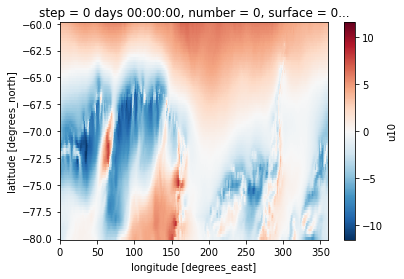

In [13]:
uv10.groupby(uv10.time.dt.month).mean(dim="time").sel(month=2).u10.plot()

In [7]:
uvStress

<xarray.Dataset>
Dimensions:     (latitude: 81, longitude: 1440, time: 198)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2003-01-31T18:00:00 ... 2019-06-30T18:00:00
    step        timedelta64[ns] ...
    surface     int64 ...
  * latitude    (latitude) float64 -60.0 -60.25 -60.5 ... -79.5 -79.75 -80.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    metss       (time, latitude, longitude) float32 ...
    mntss       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2019-11-14T10:02:20 GRIB to CDM+CF via cfgrib-0....

In [7]:
import plot_topView_contourf as topView
importlib.reload(topView)

<module 'plot_topView_contourf' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_topView_contourf.py'>

<IPython.core.display.Javascript object>


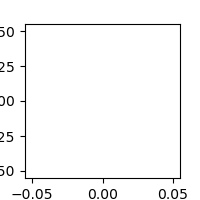

In [59]:
%matplotlib notebook
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

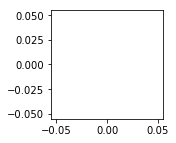

In [63]:
%matplotlib inline
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

In [11]:
def compute_stress_curl(uvStress):
    stress_curl = np.zeros_like(uvStress.metss)
    wek = np.zeros_like(uvStress.metss)
    rho0 = 1025.0
    tauy_x = np.zeros_like(uvStress.metss)
    taux_y = np.zeros_like(uvStress.metss)
    
    delta_lat = abs(float(uvStress.latitude[0] - uvStress.latitude[1]))
    delta_lon = abs(float(uvStress.longitude[0] - uvStress.longitude[1]))
    r = 6371e3 # radius of earth in metres
    dy = float(r * np.deg2rad(delta_lat))
    print(dy)
    omega = 2*np.pi/(24.*3600)
    f = 2. * omega * np.sin(np.deg2rad(uvStress.latitude.values))
    time_counter = 0
    for t in uvStress.time:
    
        lat_counter = 0
        for lat in uvStress.latitude.values:
            
            dx = float(r * np.cos(np.deg2rad(lat) ) * np.deg2rad(delta_lon))
            
            tauy_x[time_counter, lat_counter] = np.gradient(uvStress.sel(time = t, latitude=lat).mntss , dx)
            lat_counter+=1
        taux_y[time_counter], _ = np.gradient(uvStress.sel(time = t).metss , -dy, dx)
        stress_curl[time_counter] = tauy_x[time_counter] - taux_y[time_counter]
        
        for l in range(len(uvStress.latitude)):
            wek[time_counter, l] = stress_curl[time_counter, l] / (f[l] * rho0)
        time_counter += 1
    
    print(dx)
    windEk = xr.Dataset({'stressCurl':(['time', 'latitude', 'longitude'], stress_curl), 
                         'wek':(['time', 'latitude', 'longitude'], wek) }, 
                        coords={'time': uvStress.time, 'latitude': uvStress.latitude, 
                               'longitude': uvStress.longitude})
    return windEk


In [12]:
def compute_stress_curl_monthly(uvStress_monthlyMean):
    stress_curl = np.zeros_like(uvStress_monthlyMean.metss)
    wek = np.zeros_like(uvStress_monthlyMean.metss)
    rho0 = 1025.0
    tauy_x = np.zeros_like(uvStress_monthlyMean.metss)
    taux_y = np.zeros_like(uvStress_monthlyMean.metss)
    
    delta_lat = abs(float(uvStress_monthlyMean.latitude[0] - uvStress_monthlyMean.latitude[1]))
    delta_lon = abs(float(uvStress_monthlyMean.longitude[0] - uvStress_monthlyMean.longitude[1]))
    r = 6371e3 # radius of earth in metres
    dy = float(r * np.deg2rad(delta_lat))
    print(dy)
    omega = 2*np.pi/(24.*3600)
    f = 2. * omega * np.sin(np.deg2rad(uvStress_monthlyMean.latitude.values))
    time_counter = 0
    for t in uvStress_monthlyMean.month:
    
        lat_counter = 0
        for lat in uvStress_monthlyMean.latitude:
            
            dx = float(r * np.cos(np.deg2rad(lat) ) * np.deg2rad(delta_lon))
            
            tauy_x[time_counter, lat_counter] = np.gradient(uvStress_monthlyMean.sel(month = t, latitude=lat).mntss , dx)
            lat_counter+=1
        taux_y[time_counter], _ = np.gradient(uvStress_monthlyMean.sel(month = t).metss , -dy, dx)
        stress_curl[time_counter] = tauy_x[time_counter] - taux_y[time_counter]
        
        for l in range(len(uvStress_monthlyMean.latitude)):
            wek[time_counter, l] = stress_curl[time_counter, l] / (f[l] * rho0)
        time_counter += 1
    
    print(dx)
    windEk = xr.Dataset({'stressCurl':(['month', 'latitude', 'longitude'], stress_curl), 
                         'wek':(['month', 'latitude', 'longitude'], wek) }, 
                        coords={'month': uvStress_monthlyMean.month, 'latitude': uvStress_monthlyMean.latitude, 
                               'longitude': uvStress_monthlyMean.longitude})
    return windEk

In [10]:
uvStress.mntss.shape

(198, 81, 1440)

In [12]:
uvStress.mntss.GRIB_name

'Mean northward turbulent surface stress'

In [13]:
uvStress.metss.GRIB_name

'Mean eastward turbulent surface stress'

In [13]:
windEk = compute_stress_curl(uvStress.sel(time=slice(uvStress.time[0], uvStress.time[12])))

27798.731661139685
4827.1990944089075


In [10]:
uvStress_monthlyMean = uvStress.groupby(uvStress.time.dt.month).mean()

In [11]:
windEk_r = compute_stress_curl_monthly(uvStress_monthlyMean)

27798.731661139685
4827.1990944089075


In [35]:
windEk

<xarray.Dataset>
Dimensions:     (latitude: 81, longitude: 1440, time: 198)
Coordinates:
    number      int64 0
    step        timedelta64[ns] 12:00:00
    surface     int64 0
    valid_time  (time) datetime64[ns] ...
  * time        (time) datetime64[ns] 2003-01-31T18:00:00 ... 2019-06-30T18:00:00
  * latitude    (latitude) float64 -60.0 -60.25 -60.5 ... -79.5 -79.75 -80.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    stressCurl  (time, latitude, longitude) float32 4.860997e-08 ... 2.3257797e-08
    wek         (time, latitude, longitude) float32 -3.7650844e-07 ... -1.584153e-07

In [19]:
windEk.to_netcdf("/media/data/Datasets/Winds/wek_ERA5.nc")

In [8]:
windEk = xr.open_dataset("/media/data/Datasets/Winds/wek_ERA5.nc",)

In [9]:
import cartopy as cart

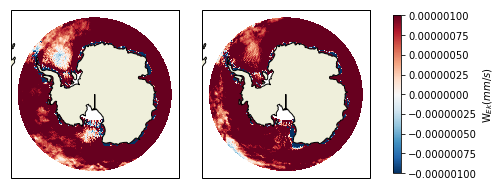

In [32]:
plt.close(1)
plt.figure(1, figsize=(7,7))

gs = gridspec.GridSpec(7, 3, width_ratios=[1,1,0.05])
mapax = plt.subplot(gs[:,0], projection = ccrs.Orthographic(central_latitude=-90, central_longitude=0) )
CF = mapax.pcolormesh(windEk.longitude, windEk.latitude, windEk_r.sel(month=2).wek, vmin=-1e-6, vmax=1e-6, cmap='RdBu_r',
                      transform = ccrs.PlateCarree() )

mapax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')

mapax = plt.subplot(gs[:,1], projection = ccrs.Orthographic(central_latitude=-90, central_longitude=0) )
CF = mapax.pcolormesh(windEk.longitude, windEk.latitude, windEk_r.sel(month=9).wek, vmin=-1e-6, vmax=1e-6, cmap='RdBu_r',
                      transform = ccrs.PlateCarree() )
mapax.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')


colorbar_ax = plt.subplot(gs[2:-2,2])
Colorbar(mappable = CF, ax = colorbar_ax)
colorbar_ax.set_ylabel('W$_{Ek} (mm/s)$')
plt.savefig("./Images/wind/windEk_r.jpg", dpi=300, bbox_inches='tight')
plt.show()

$\vec{\nabla} \times \vec{\tau} = \frac{\partial \tau_y}{\partial x} - \frac{\partial \tau_x}{\partial y}$

In [7]:
import plot_bathymetryGradients as pbgrad
importlib.reload(pbgrad)

<module 'plot_bathymetryGradients' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_bathymetryGradients.py'>

In [8]:
bathy_gradient = pbgrad.compute_bathymetryGradients(lonstep=5, latstep=1)

In [10]:
bathy = xr.open_dataset('/media/data/Datasets/Bathymetry/GEBCO_2014_2D.nc')

In [10]:
lonlen = len(bathy.lon)
lonindices = np.arange(0, lonlen+1, 5) # lonstep=5, every 5th longitude
lonindices[-1] = lonindices[-1] - 1
bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 1))

In [11]:
bathy_gradient = ma.masked_array(np.array(bathy_gradient))
bathy_gradient.mask = (bathy_gradient < 0.002) | (bathyS.elevation < -3500) | (bathyS.elevation > -800)

In [12]:
bathyS['bathy_gradient'] = (['lat', 'lon'], bathy_gradient)

In [24]:
bathyS['bathy_gradient_mask'] = (['lat', 'lon'], bathy_gradient.mask)

NameError: name 'bathy_gradient' is not defined

In [11]:
bathyS = xr.open_dataset("/media/hdd2/SOSE_1_12/bathyS.nc")

In [12]:
slopeLonLatLims = np.array([ [-50.,-25., -75, -71] , [-25, -5, -80, -65], [-5, 0, -85, -67.6], 
                            [0,8, -85, -67.6], [8,46.9832, -80, -60], [46.9832, 48.3, -66.7, -60],
                            [48.3, 49.118, -80, -60], [49.118, 50.139, -66.455, -60], [50.139, 57.4, -80, -60],
                            [57.4, 58.9, -66.47, -60],[58.9, 59.68, -66.7, -60], [59.68, 60, -80, -60],
                            [60, 61.5, -66.85, -60], [61.5, 64, -80, -60], [64, 66, -67.1, -60],
                            [66, 79.4, -67.5, -63.5], [79.4, 81.5, -66.7, -64], [81.5, 89.68, -80, -64],
                            [89.68, 92.5, -65.8, -60], [92.5, 92.7, -80, -60], [92.7, 101, -65.1, -60],
                            [101, 103, -65, -60], [103, 105, -80, -60], [105, 109.5, -65.5, -60],
                            [109.5, 113, -65.9, -60], [113, 115, -65.47, -60], [115, 122, -80, -60], 
                            [122, 126, -66, -60], [126, 134, -65.3, -63], [134, 135, -65, -63],
                            [135, 148.6, -66.25, -63], [148.6, 152, -80, -65], [152, 155, -80, -65.5],
                            [155, 160, -80, -66], [160, 170, -73, -68.5], [170, 180, -73.6, -68.5],
                            [-180, -170, -80, -70], [-170, -160, -80, -73],
                            [-160, -151.3, -76.6, -73], [-151.3, -148.7, -76, -73], [-148.7, -140, -80, -73],
                            [-140, -136, -74.38, -71], [-136, -132, -74.3, -71], [-132, -130, -73.9, -71],
                            [-130, -120, -73.26, -70], [-120, -110, -72.8, -70], [-110, -100, -72, -70],
                            [-100, -90, -71.6, -69.3], [-90, -80, -71, -67.8], [-80, -75, -69.5, -65],
                            [-75, -72, -68.4, -65], [-72, -70, -67.6, -65], [-70, -68, -66.2, -63],
                            [-68, -66, -65, -63], [-66, -64, -64, -62.7], [-64, -62.37, -63.1, -61.86],
                            [-62.37, -62, -62.7, -61.86], [-62, -60, -62.55, -61], [-60, -58, -62, -60.8],
                            [-58, -56, -61.5, -60.6],
                            [-56, -50, -80, -60]] )

In [13]:
slopeLonLatLims[:, 0:2][slopeLonLatLims[:, 0:2] < 0] = slopeLonLatLims[:, 0:2][slopeLonLatLims[:, 0:2] < 0] + 360
slopeLonLatLims[2][1] = 360
slopeLonLatLims[:, :]

array([[310.    , 335.    , -75.    , -71.    ],
       [335.    , 355.    , -80.    , -65.    ],
       [355.    , 360.    , -85.    , -67.6   ],
       [  0.    ,   8.    , -85.    , -67.6   ],
       [  8.    ,  46.9832, -80.    , -60.    ],
       [ 46.9832,  48.3   , -66.7   , -60.    ],
       [ 48.3   ,  49.118 , -80.    , -60.    ],
       [ 49.118 ,  50.139 , -66.455 , -60.    ],
       [ 50.139 ,  57.4   , -80.    , -60.    ],
       [ 57.4   ,  58.9   , -66.47  , -60.    ],
       [ 58.9   ,  59.68  , -66.7   , -60.    ],
       [ 59.68  ,  60.    , -80.    , -60.    ],
       [ 60.    ,  61.5   , -66.85  , -60.    ],
       [ 61.5   ,  64.    , -80.    , -60.    ],
       [ 64.    ,  66.    , -67.1   , -60.    ],
       [ 66.    ,  79.4   , -67.5   , -63.5   ],
       [ 79.4   ,  81.5   , -66.7   , -64.    ],
       [ 81.5   ,  89.68  , -80.    , -64.    ],
       [ 89.68  ,  92.5   , -65.8   , -60.    ],
       [ 92.5   ,  92.7   , -80.    , -60.    ],
       [ 92.7   , 10

In [14]:
#slopeLonLatLims[:, 0:2][slopeLonLatLims[:, 0:2] < 0] = slopeLonLatLims[:, 0:2][slopeLonLatLims[:, 0:2] < 0] + 360
#slopeLonLatLims[2][1] = 360

slopeMask = np.zeros(uv10.sel(time = 0, method="nearest").u10.shape, dtype=bool)
for i in range(len(slopeLonLatLims)):
    slopeMask = slopeMask + ~np.isnan(uv10.isel(time=0).u10.where\
                                        (uv10.longitude >= slopeLonLatLims[i][0]).where\
                                        (uv10.longitude <= slopeLonLatLims[i][1]).where\
                                        (uv10.latitude >= slopeLonLatLims[i][2]).where\
                                        (uv10.latitude <= slopeLonLatLims[i][3]).values)

windlons = np.copy(uv10.longitude.values)
windlons[windlons > 180] = windlons[windlons > 180] - 360
windlats = uv10.latitude.values

bathyGradMask = bathyS.sel(lon= windlons, lat=windlats, method='nearest').bathy_gradient_mask.values
#del(bathyS)


In [31]:
wind_echodepth = bathyS.sel(lon= windlons, lat=windlats, method='nearest').elevation.values

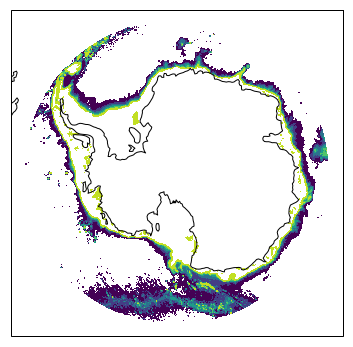

In [23]:
plt.close(1)
plt.figure(1, figsize=(6,6))
mapax = plt.subplot(projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0) )

lons = bathyS.lon
lats = bathyS.lat
elev = bathyS.elevation.where(~bathyS.bathy_gradient_mask)

mapax.contourf(lons, lats, elev, vmin=-3000, vmax=-800, extend='both', transform= ccrs.PlateCarree())
mapax.coastlines()

plt.show()

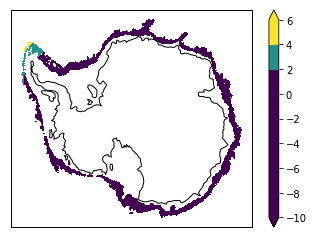

In [22]:
plt.close(1)
plt.figure(1)
mapax = plt.subplot(projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0) )

lons = uv10.longitude.values
lats = uv10.latitude.values

monthlyMeanZonal = uv10.groupby(uv10.time.dt.month).mean().u10.\
                                                       where(~bathyGradMask & slopeMask).sel(month=3)

CF = mapax.contourf(lons, lats, monthlyMeanZonal, cmap='viridis', vmin=1, vmax=5, extend='both',
                     transform= ccrs.PlateCarree())
mapax.coastlines()

plt.colorbar(CF)
plt.show()

In [15]:
windlons = np.copy(uv10.longitude.values)
windlons[windlons > 180] = windlons[windlons > 180] - 360
windlats = np.copy(uv10.latitude.values)

bathySwindlons = bathyS.sel(lon= windlons, lat=uv10.latitude, method='nearest')
shelfSelMask = ~np.isnan(bathySwindlons.where((bathySwindlons.elevation < 0) & (bathySwindlons.elevation > -1000) ).\
                        elevation.values)

In [16]:
def plot_fields_orthographic(field, longitude_coord, latitude_coord, vmin, vmax, save=False, savename="untitled.png",
                             colorbar_label="", region_lons=None):
    DATADIR = "/media/data"
    plt.close(1)
    plt.figure(1, figsize=(7,7) )
    gs = gridspec.GridSpec(5, 2, width_ratios=[1, 0.05], wspace=0.05)

    mapax = plt.subplot(gs[:,0], projection = ccrs.Orthographic(central_longitude=0, central_latitude=-90) )
    CF = mapax.pcolormesh(longitude_coord, latitude_coord, 
                          field, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin = -8, vmax = 8)

    gl = mapax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, zorder=2,
                  linewidth=0.5, color='gray', alpha=1, linestyle='--')
    
    gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 20))
    gl.ylocator = mticker.FixedLocator(np.arange(-80, -59, 5))
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    if region_lons:
        gl_regions = mapax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='blue', alpha=1, linestyle=':', zorder=3)
        #gl_regions_lowZ = mapax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='blue', alpha=1, linestyle='--', zorder=1)
        gl_regions.xlocator = mticker.FixedLocator(region_lons)
        gl_regions.ylocator = mticker.FixedLocator(np.arange(-80, -59, 5) )
        gl_regions.xformatter = LONGITUDE_FORMATTER
        gl_regions.yformatter = LATITUDE_FORMATTER
        gl_regions.ylines = False

    shpfile = DATADIR+"/Datasets/Shapefiles/AntarcticGroundingLine/GSHHS_f_L6.shp"
    with fiona.open(shpfile) as records:
        geometries = [sgeom.shape(shp['geometry']) for shp in records]
    ISedgefname = DATADIR+"/Datasets/Shapefiles/AntIceShelf/ne_10m_antarctic_ice_shelves_polys.shp"
    ISe_feature = ShapelyFeature(Reader(ISedgefname).geometries(), 
                                 ccrs.PlateCarree(), linewidth=0.2,
                                 facecolor='none', 
                                 edgecolor="k")

    mapax.add_geometries(geometries, ccrs.PlateCarree(), edgecolor='0.25', facecolor='0.7',alpha=0.25, linewidth=0.2)
    mapax.add_feature(ISe_feature, zorder=3)

    for l in np.arange(-160, 181, 20):
        if( (l == 80) or (l == 100) ):
            text_lat = -80
        else:
            text_lat  = -62.5
        mapax.text(l, text_lat, str(l)+"$^{\circ}$", transform=ccrs.PlateCarree() )    
        
    colorbar_ax = plt.subplot(gs[1:-1, 1])
    Colorbar(mappable = CF, ax = colorbar_ax)
    colorbar_ax.set_ylabel(colorbar_label)

    if save:
        plt.savefig(savefig, dpi=600)
    plt.show()

In [18]:
import plot_topView_contourf as topView
importlib.reload(topView)

<module 'plot_topView_contourf' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_topView_contourf.py'>

In [1]:
uv10.time

NameError: name 'uv10' is not defined

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


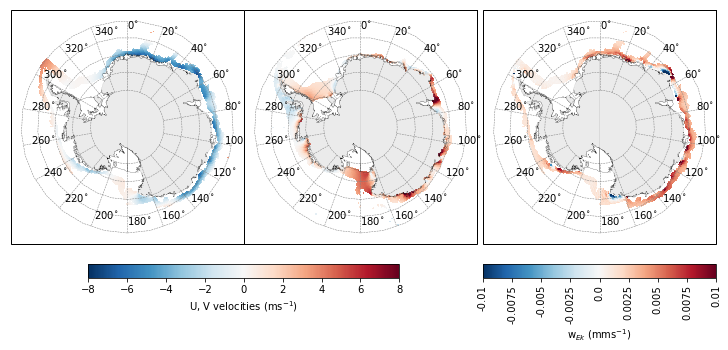

In [19]:
plt.close(1)
plt.figure(1, figsize=(321.1/25.4, 134.4/25.4))
gs = gridspec.GridSpec(2, 8, width_ratios=[1/3]*6+[0.025, 1], height_ratios=[1, 0.05], wspace=0, hspace=0)

u10_clim_mean = uv10.u10.where(slopeMask & ~bathyGradMask).mean(dim='time')
u_axis = plt.subplot(gs[0, 0:3], projection = ccrs.Orthographic(central_latitude=-90, central_longitude=0) )
CF_u = topView.plot_fields_orthographic(u10_clim_mean, uv10.longitude, uv10.latitude, 
                         vmin=-8, vmax=8, colorbar_label="U$_{10}$ (ms$^{-1}$)", plot_colorbar=False, mapax=u_axis)

v10_clim_mean = uv10.v10.where(shelfSelMask).mean(dim='time')
v_axis = plt.subplot(gs[0, 3:6], projection = ccrs.Orthographic(central_latitude=-90, central_longitude=0) )
CF_v = topView.plot_fields_orthographic(v10_clim_mean, uv10.longitude, uv10.latitude, 
                         vmin=-8, vmax=8, colorbar_label="V$_{10}$ (ms$^{-1}$)", plot_colorbar=False, mapax=v_axis)

colorbar_uv_axis = plt.subplot(gs[1, 1:5])
Colorbar(mappable = CF_v, ax = colorbar_uv_axis, orientation = 'horizontal')
colorbar_uv_axis.set_xlabel('U, V velocities (ms$^{-1}$)')

wek_clim_mean = windEk.where(slopeMask & ~bathyGradMask).mean(dim='time').wek * 1e3
wek_axis = plt.subplot(gs[0, 7], projection = ccrs.Orthographic(central_latitude=-90, central_longitude=0) )
CF_wek = topView.plot_fields_orthographic(wek_clim_mean, uv10.longitude, uv10.latitude, 
                         vmin=-1e-2, vmax=1e-2, colorbar_label="V$_{10}$ (ms$^{-1}$)", plot_colorbar=False, mapax=wek_axis)

colorbar_wek_axis = plt.subplot(gs[1, 7])
Colorbar(mappable = CF_wek, ax = colorbar_wek_axis, orientation = 'horizontal')
colorbar_wek_axis.set_xlabel('w$_{Ek}$ (mms$^{-1}$)')
colorbar_wek_axis.set_xticklabels(np.round(np.linspace(-1e-2, 1.00e-2, 9), decimals=4), rotation=90)

plt.savefig("./Images/wind/wind_clim_3comp.jpg", dpi=600, bbox_inches="tight")
plt.show()

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


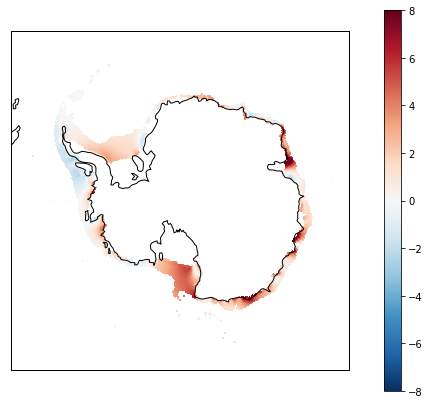

In [52]:
plt.close(1)
plt.figure(1, figsize=(7,7) )
gs = gridspec.GridSpec(5, 2, width_ratios=[1, 0.05])

mapax = plt.subplot(gs[:,0], projection = ccrs.Orthographic(central_longitude=0, central_latitude=-90) )
CF = mapax.pcolormesh(uv10.longitude, uv10.latitude, 
                 uv10.v10.where(shelfSelMask).mean(dim='time'), 
                 transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin = -8, vmax = 8)
mapax.coastlines()

colorbar_ax = plt.subplot(gs[1:-1, 1])
Colorbar(mappable = CF, ax = colorbar_ax)
plt.show()

In [29]:
slope_cells = ma.masked_array(np.ones_like(uv10.isel(time=0).u10), mask = ~(~bathyGradMask & slopeMask))

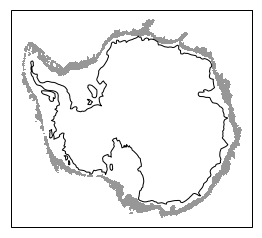

In [35]:
plt.close(1)
plt.figure(1)
mapax = plt.subplot(projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0) )

lons = uv10.longitude.values
lats = uv10.latitude.values

CF = mapax.contourf(lons, lats, slope_cells, cmap='Greys', vmin=0, vmax=2, extend='both',
                     transform= ccrs.PlateCarree())
mapax.coastlines()

#plt.colorbar(CF)
plt.show()

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


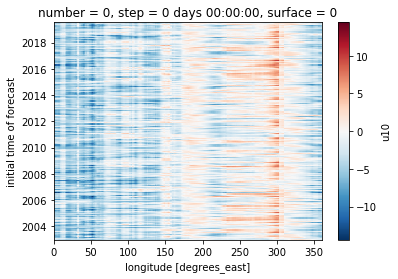

In [38]:
uv10.where(~bathyGradMask & slopeMask).u10.mean(dim='latitude').plot()

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


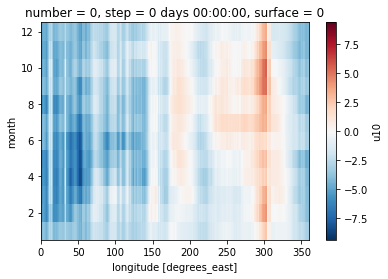

In [62]:
uv10.where(~bathyGradMask & slopeMask).u10.mean(dim='latitude').groupby(uv10.time.dt.month).\
mean(dim='time').plot()

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


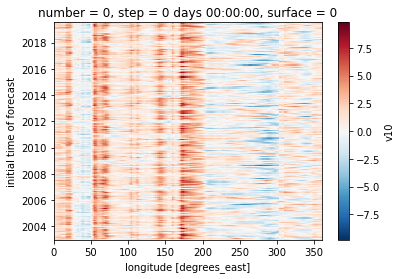

In [82]:
uv10.v10.where(~bathyGradMask & slopeMask).mean(dim=['latitude']).plot()

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


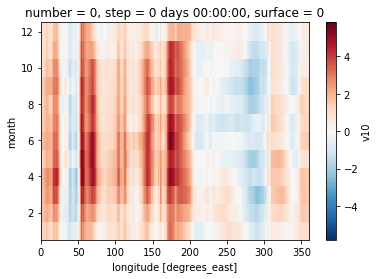

In [39]:
uv10.where(~bathyGradMask & slopeMask).v10.mean(dim='latitude').groupby(uv10.time.dt.month).\
mean(dim='time').plot()

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


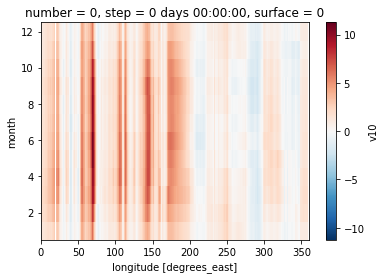

In [50]:
uv10.where(shelfSelMask).v10.mean(dim='latitude').groupby(uv10.time.dt.month).\
mean(dim='time').plot()

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


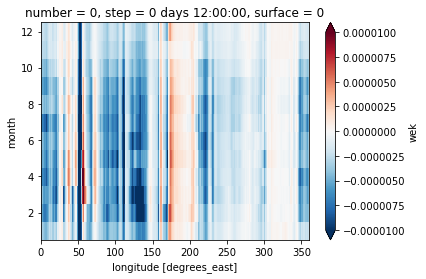

In [51]:
windEk.groupby(windEk.time.dt.month).mean().wek.\
               where(~bathyGradMask & slopeMask).mean(dim=['latitude']).plot(vmin=-1e-5, vmax=1e-5, extend='both', 
                                                                         cmap='RdBu_r')

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


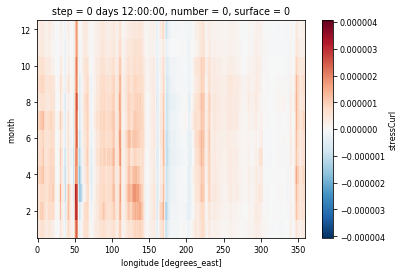

In [65]:
windEk.groupby(windEk.time.dt.month).mean().stressCurl.\
               where(~bathyGradMask & slopeMask).mean(dim=['latitude']).plot(cmap='RdBu_r')

In [97]:
from matplotlib.colorbar import Colorbar

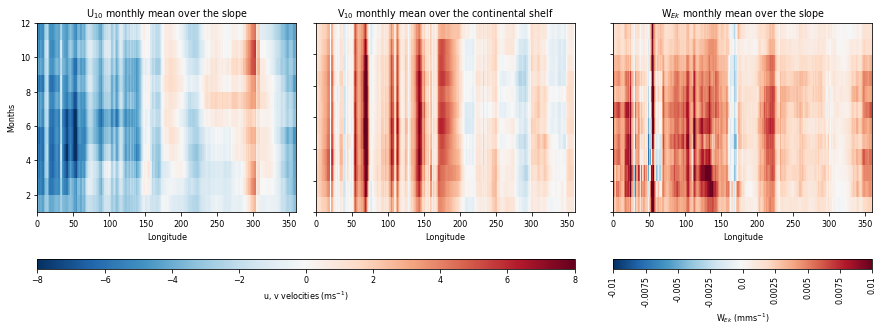

In [112]:
plt.close(1)
plt.figure(1, figsize=(190*2/25.4, 230*0.5/25.4) )

gs = gridspec.GridSpec(3, 4, height_ratios=[1,0.25, 0.05], width_ratios=[1,1, 0.0, 1], wspace=0.1, hspace=0 )

ax1 = plt.subplot(gs[0,0])
#u_slope_mon_mean = uv10.where(~bathyGradMask & slopeMask).u10.mean(dim='latitude').\
#                    groupby(uv10.time.dt.month).mean(dim='time')
CF1 = ax1.pcolormesh(u_slope_mon_mean.longitude, u_slope_mon_mean.month, u_slope_mon_mean, cmap='RdBu_r', vmin=-8,
                    vmax=8)
ax1.set_ylabel('Months', )
ax1.set_xlabel('Longitude')
ax1.set_title('U$_{10}$ monthly mean over the slope')

ax2 = plt.subplot(gs[0,1])
#v_shelf_mon_mean = uv10.where(shelfSelMask).v10.mean(dim='latitude').\
#                    groupby(uv10.time.dt.month).mean(dim='time')
CF2 = ax2.pcolormesh(u_slope_mon_mean.longitude, np.arange(13), v_shelf_mon_mean, cmap='RdBu_r', vmin=-8, 
                     vmax=8)
ax2.set_yticklabels([])
ax2.set_xlabel('Longitude')
ax2.set_title('V$_{10}$ monthly mean over the continental shelf')

cax2 = plt.subplot(gs[2,0:2])
Colorbar(mappable = CF2, ax= cax2, orientation='horizontal')
cax2.set_xlabel('u, v velocities (ms$^{-1}$)')
#cbar.set_label_position('left')
#cax2.yaxis.set_ticks_position('left')

ax3 = plt.subplot(gs[0,3])
#wek_slope_mon_mean = windEk.groupby(windEk.time.dt.month).mean().wek.\
#               where(~bathyGradMask & slopeMask).mean(dim=['latitude']) * 1e3
#cax3.set_xticklabels(np.arange(-1e-2, 1.001e-2, 0.2e-2), rotation=90)
CF3 = ax3.pcolormesh(u_slope_mon_mean.longitude, np.arange(13), wek_slope_mon_mean, cmap='RdBu_r', vmin=-1e-2,
                    vmax=1e-2)
ax3.set_yticklabels([])
ax3.set_xlabel('Longitude')
ax3.set_title('W$_{Ek}$ monthly mean over the slope')

cax3 = plt.subplot(gs[2,3])
cbar = Colorbar(mappable = CF3, ax= cax3, orientation='horizontal', format="%.4f")

#cax3.set_xlim(-1e-2, 1e-2)
#cax3.set_xticks(np.arange(-1e-2, 1.001e-2, 0.2e-2))
cax3.set_xticklabels(np.round(np.linspace(-1e-2, 1.00e-2, 9), decimals=4), rotation=90)

#cax3.ticklabel_format(axis='x', style='sci')

cax3.set_xlabel('W$_{Ek}$ (mms$^{-1}$)')

plt.savefig('./Images/wind/Wind_3comp_Hovmoller.jpg', dpi=600, bbox_inches='tight')

In [96]:
waterMassThickness = pd.read_csv("./waterMassThickness_20_winds.csv")

In [46]:
uv10

<xarray.Dataset>
Dimensions:     (latitude: 81, longitude: 1440, time: 199)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2003-01-01 2003-02-01 ... 2019-07-01
    step        timedelta64[ns] ...
    surface     int64 ...
  * latitude    (latitude) float64 -60.0 -60.25 -60.5 ... -79.5 -79.75 -80.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2019-11-11T12:50:25 GRIB to CDM+CF via cfgrib-0....

In [50]:
i = 0 
windStressCurl_MonMeanRegional = windEk.groupby(windEk.time.dt.month).mean().wek.\
                                 where(~bathyGradMask & slopeMask).mean(dim=['latitude']).\
                                 sel(longitude = slice(regionsLonlim[i,0], regionsLonlim[i,1])).mean(dim='longitude') * 1e3

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [51]:
windStressCurl_MonMeanRegional

<xarray.DataArray 'wek' (month: 12)>
array([ 1.5418201e-04, -5.5377543e-05, -6.5887627e-07, -1.6274240e-05,
       -2.5346997e-04, -2.3748113e-04, -1.2417338e-04, -5.3216767e-04,
       -2.4261767e-04,  5.3554479e-05,  2.8036512e-04,  2.9004697e-04],
      dtype=float32)
Coordinates:
    step     timedelta64[ns] 12:00:00
    number   int64 0
    surface  int64 0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [97]:
region1LonLims = [ [-40.,-20.] ,  [60,70], [70,75], 
                  [75,82], [135,145], [170,180]]

region1LatLims = [ [-74.8, -72], [-67.16, -66.47], [-66.9, -66.35],
                   [-66.9, -65.215], [-66, -65.4], [-73.45, -70]]

region2LonLims = [ [-20., 0.] ,  [29,37], [82,87], 
                  [101,112], [-120,-100], [-100,-60]]

region2LatLims = [ [-73.15, -69], [-69.44, -65.38], [-66.18, -65.56], 
                   [-65.55, -64.5], [-72.7, -70.7], [-71, -61.4]]

regionsLonlim = region1LonLims + region2LonLims
regionsLatlim = region1LatLims + region2LatLims

regionsLonlim = np.array(regionsLonlim)
regionsLonlim[regionsLonlim < 0] = regionsLonlim[regionsLonlim < 0] + 360
regionsLonlim[6, 1] = 360.

In [98]:
wmA1regions = waterMassThickness.region.str.contains("NIS")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()

wmA2regions = waterMassThickness.region.str.contains("DIS")
regionsA2 = waterMassThickness.loc[wmA2regions, "region"].unique()

regionalMasks = [None]* len(regionsA1)

for i in range(len(regionsLonlim)):
    wmRegionMaskA1 = (waterMassThickness.region == regionsA1[i])
    wmRegionMaskA2 = (waterMassThickness.region == regionsA2[i] )
    
    u10_MonMeanRegional = u10_MonMeanRegional = uv10.where(~bathyGradMask & slopeMask).u10.mean(dim='latitude').\
                               sel(longitude=slice(regionsLonlim[i,0], regionsLonlim[i,1]) ).\
                                groupby(uv10.time.dt.month).mean(dim='time').mean('longitude').values
    
    v10_MonMeanRegional = uv10.where(shelfSelMask).v10.mean(dim='latitude').\
                           sel(longitude = slice(regionsLonlim[i,0], regionsLonlim[i,1]) ).\
                                groupby(uv10.time.dt.month).mean(dim='time').mean(dim='longitude')
    
    windStressCurl_MonMeanRegional = windEk.stressCurl.where(~bathyGradMask & slopeMask).mean(dim=['latitude']).\
                                 sel(longitude = slice(regionsLonlim[i,0], regionsLonlim[i,1])).\
                                 groupby(windEk.time.dt.month).mean(dim='time').mean(dim='longitude')   # Stress Curl
    
    waterMassThickness.loc[wmRegionMaskA1, "u10SlopeMonMean"] = u10_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "u10SlopeMonMean"] = u10_MonMeanRegional
    
    waterMassThickness.loc[wmRegionMaskA1, "v10MonMean"] = v10_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "v10MonMean"] = v10_MonMeanRegional
    
    waterMassThickness.loc[wmRegionMaskA1, "stress_curl_slope_MonMean"] = windStressCurl_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "stress_curl_slope_MonMean"] = windStressCurl_MonMeanRegional
    
waterMassThickness["neg_u10SlopeMonMean"] = -waterMassThickness.u10SlopeMonMean
waterMassThickness["neg_stress_curl"] = -waterMassThickness.stress_curl_slope_MonMean

In [99]:
import plot_waterMassThickness as pltwmthk
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py:935: RuntimeWarning: divide by zero encountered in arctanh
  r_z = np.arctanh(r)


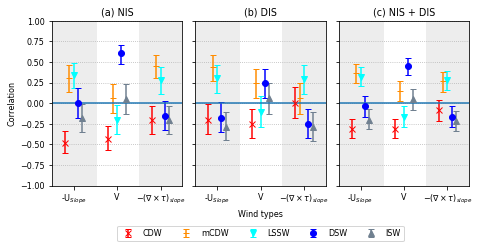

In [100]:
regionsNames = ["NIS", "DIS", "IS"]

titles1 = ["(a) NIS", "(b) DIS", "(c) NIS + DIS"] 

pltwmthk.plot_WaterMass_Correlation_byRegion_CI(waterMassThickness, regionsName=regionsNames, titles=titles1, save=True, 
                                    savename="./Images/waterMassBudgets2/windWaterMassCorrelation_A1_A2_ERA5.pdf", 
                                                mrows=1, ncols=3, ht=4)

In [70]:
waterMassThickness_interim = pd.read_csv("waterMassThickness_20_winds.csv")